In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#cargar el data set
df = pd.read_csv("Electric_Vehicle_Population_Data.csv ")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223995 entries, 0 to 223994
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         223995 non-null  object 
 1   County                                             223992 non-null  object 
 2   City                                               223992 non-null  object 
 3   State                                              223995 non-null  object 
 4   Postal Code                                        223992 non-null  float64
 5   Model Year                                         223995 non-null  int64  
 6   Make                                               223995 non-null  object 
 7   Model                                              223995 non-null  object 
 8   Electric Vehicle Type                              223995 non-null  object

In [17]:
df.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4JJXP66P,Kitsap,Poulsbo,WA,98370.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,23.0,258127145,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
1,1G1FX6S08K,Snohomish,Lake Stevens,WA,98258.0,2019,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,44.0,4735426,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10


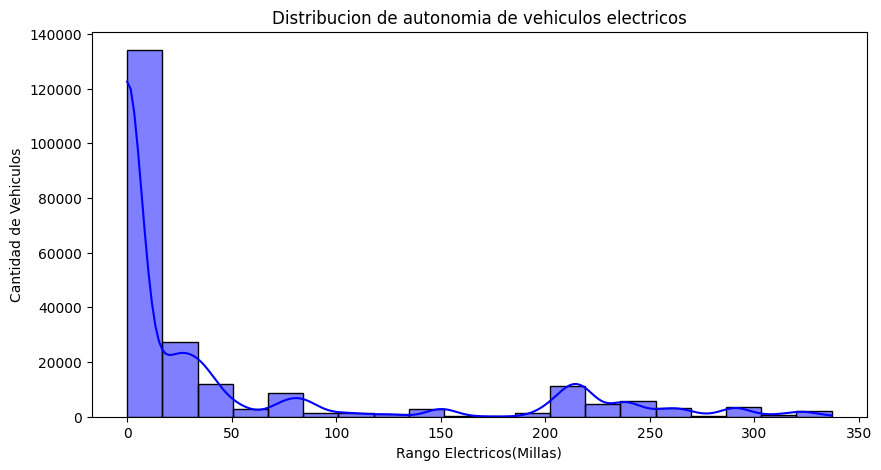

In [18]:
#histograma de electric range antes de la limpieza 

plt.figure(figsize=(10,5))
sns.histplot(df["Electric Range"], bins=20, kde=True, color="blue")
plt.title("Distribucion de autonomia de vehiculos electricos")
plt.xlabel("Rango Electricos(Millas)")
plt.ylabel("Cantidad de Vehiculos")
plt.show()

In [19]:
#--------------limpieza y la normalizacion de los datos ----------------#
#manejar datos faltantes 
df.fillna({"County": "Unknown",
            "City": "Unknown", 
            "Electric Range": df["Electric Range"].median(), 
            "Base MSRP":df["Base MSRP"].median(),
            "Legislative District": "Unknown"},
            inplace=True)


#conversion de tipo de datos 
df["Postal Code"] = df["Postal Code"].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223995 entries, 0 to 223994
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         223995 non-null  object 
 1   County                                             223995 non-null  object 
 2   City                                               223995 non-null  object 
 3   State                                              223995 non-null  object 
 4   Postal Code                                        223995 non-null  object 
 5   Model Year                                         223995 non-null  int64  
 6   Make                                               223995 non-null  object 
 7   Model                                              223995 non-null  object 
 8   Electric Vehicle Type                              223995 non-null  object

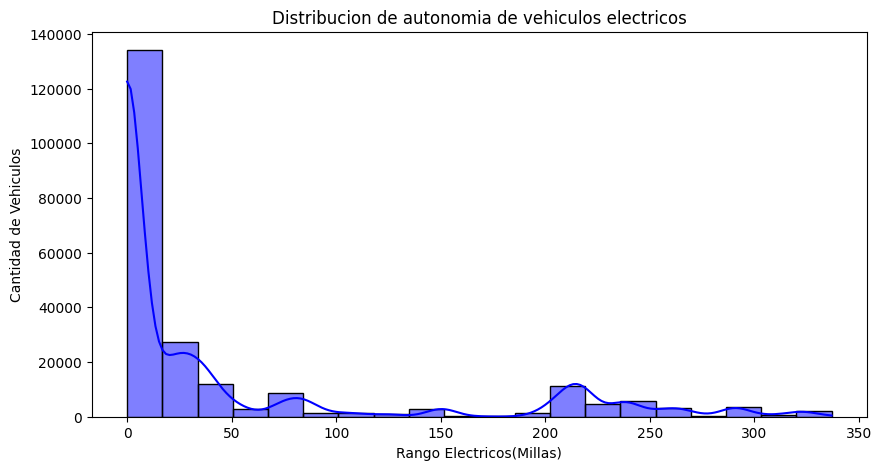

In [20]:
#histograma de electric range despues de la limpieza 

plt.figure(figsize=(10,5))
sns.histplot(df["Electric Range"], bins=20, kde=True, color="blue")
plt.title("Distribucion de autonomia de vehiculos electricos")
plt.xlabel("Rango Electricos(Millas)")
plt.ylabel("Cantidad de Vehiculos")
plt.show()

In [24]:
df["Make"].value_counts().head(10)

Make
TESLA        96180
CHEVROLET    16405
NISSAN       15259
FORD         11930
KIA          10760
BMW           9171
TOYOTA        8956
HYUNDAI       6878
RIVIAN        6236
JEEP          5773
Name: count, dtype: int64

Make
TESLA        96180
CHEVROLET    16405
NISSAN       15259
FORD         11930
KIA          10760
BMW           9171
TOYOTA        8956
HYUNDAI       6878
RIVIAN        6236
JEEP          5773
Name: count, dtype: int64


C:\Users\nielm\AppData\Local\Temp\ipykernel_17564\542217905.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= top_brands.index, y= top_brands.values, palette="viridis")


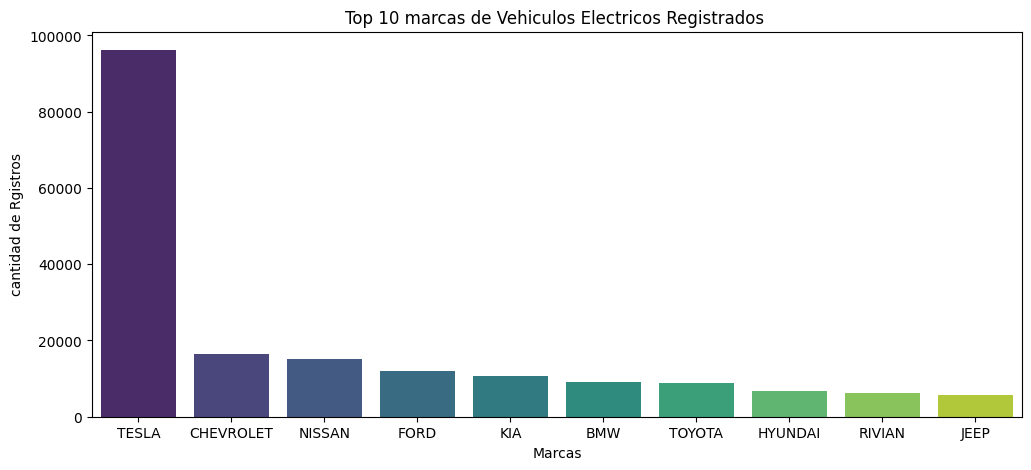

In [33]:
#-------------Analizis de adopcion de Vehiculos electricos -------------------
#top 10 marcas con mas registros 

top_brands = df["Make"].value_counts().head(10)

print(top_brands)

plt.figure(figsize=(12,5))
sns.barplot(x= top_brands.index, y= top_brands.values, palette="viridis")
plt.title("Top 10 marcas de Vehiculos Electricos Registrados ")
plt.xlabel("Marcas")
plt.ylabel("cantidad de Rgistros")

plt.show()

In [35]:
#evolucion de registros de vehiculos electricos por año 

print(df["Model Year"])

0         2023
1         2019
2         2015
3         2019
4         2015
          ... 
223990    2024
223991    2021
223992    2011
223993    2024
223994    2019
Name: Model Year, Length: 223995, dtype: int64


In [45]:
df_filter = df[(df["Model Year"] >= 1999) & (df["Model Year"] <= 2024 )]
filterModelYear = df_filter.groupby("Model Year").size()

print(filterModelYear)


Model Year
1999        2
2000        7
2002        2
2003        1
2008       23
2010       23
2011      692
2012     1513
2013     4258
2014     3404
2015     4680
2016     5358
2017     8433
2018    14142
2019    10874
2020    12103
2021    20278
2022    28610
2023    59060
2024    45525
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

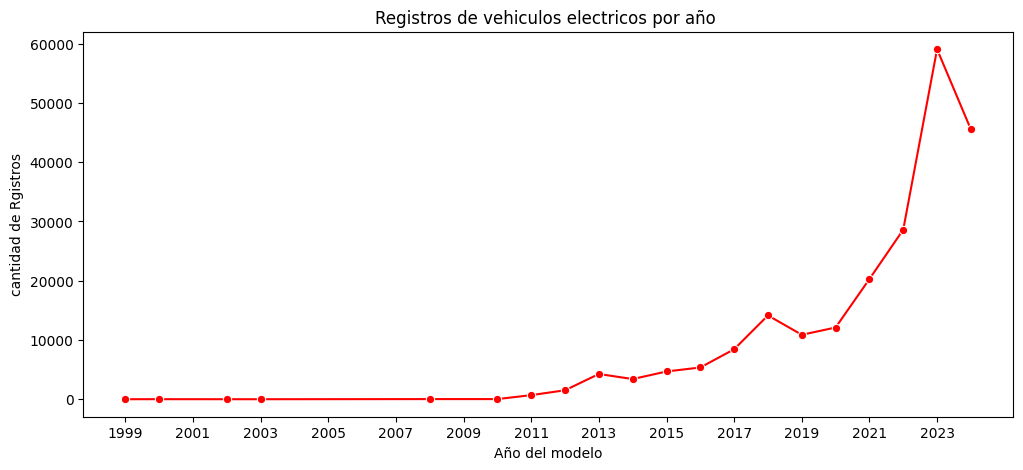

In [47]:
plt.figure(figsize=(12,5))
sns.lineplot(data=filterModelYear, marker='o', color= 'red')
plt.xticks(ticks=range(1999,2024,2))
plt.title("Registros de vehiculos electricos por año ")
plt.xlabel("Año del modelo")
plt.ylabel("cantidad de Rgistros")
plt.show

In [ ]:
#impacto de autonomia 
df["Base MSRP"].value_counts()

Base MSRP
0.0         220735
69900.0       1315
31950.0        364
52900.0        218
32250.0        139
59900.0        121
54950.0        118
39995.0        117
36900.0        104
44100.0         95
64950.0         88
45600.0         75
33950.0         71
52650.0         71
34995.0         67
55700.0         57
36800.0         54
53400.0         39
81100.0         23
98950.0         22
110950.0        20
90700.0         17
102000.0        12
75095.0         12
184400.0        11
43700.0          8
109000.0         7
89100.0          7
91250.0          4
32995.0          3
845000.0         1
Name: count, dtype: int64

In [50]:
df["Electric Range"].value_counts()

Electric Range
0.0      130460
215.0      6296
32.0       5254
25.0       4559
21.0       4458
          ...  
11.0          4
51.0          4
95.0          3
57.0          2
74.0          2
Name: count, Length: 109, dtype: int64

In [55]:
df_filter = df[(df["Base MSRP"] > 1000) & (df["Base MSRP"] < 200000 )]
df_filter["Base MSRP"]

6         55700.0
16        69900.0
24        45600.0
51        69900.0
88        31950.0
           ...   
223727    69900.0
223792    39995.0
223934    69900.0
223972    31950.0
223982    39995.0
Name: Base MSRP, Length: 3259, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

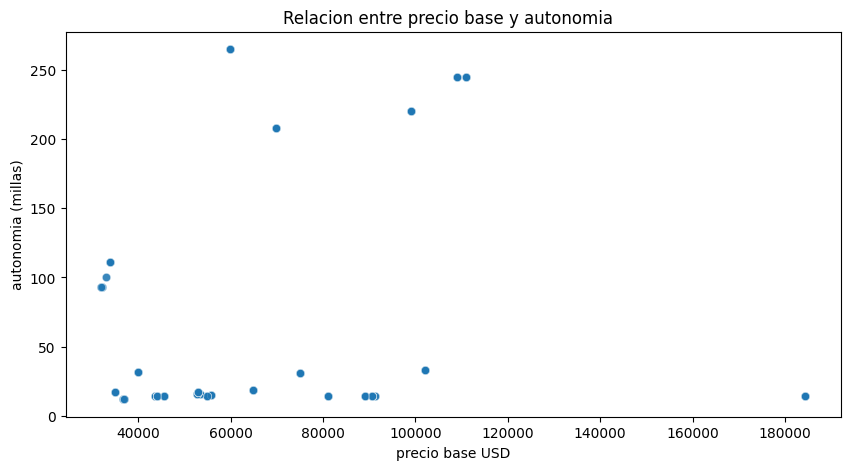

In [57]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_filter["Base MSRP"],y=df_filter["Electric Range"], alpha=0.5)
plt.title("Relacion entre precio base y autonomia  ")
plt.xlabel("precio base USD")
plt.ylabel("autonomia (millas)")
plt.show

In [60]:
#eligibilidad para programa de combustible alternativo 
elegibility_count = df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].value_counts()

<function matplotlib.pyplot.show(close=None, block=None)>

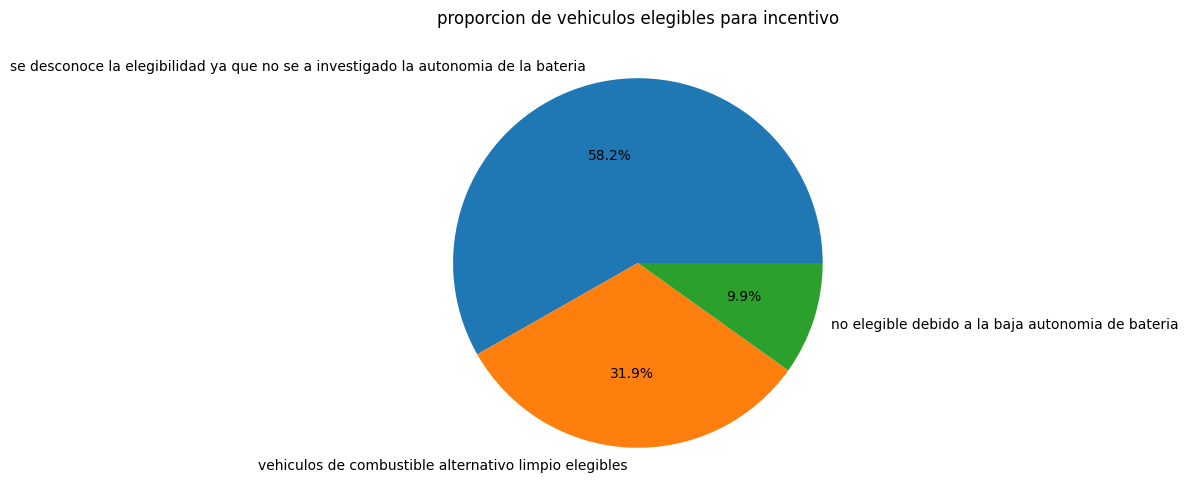

In [64]:
plt.figure(figsize=(6,6))
plt.pie(elegibility_count, labels=[
    "se desconoce la elegibilidad ya que no se a investigado la autonomia de la bateria",
    "vehiculos de combustible alternativo limpio elegibles",
    "no elegible debido a la baja autonomia de bateria"],
    autopct='%1.1f%%')
plt.title("proporcion de vehiculos elegibles para incentivo")
plt.show